# Curve Smoothing

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

### Moving Average

$ M_t = \cfrac{1}{2 \cdot q + 1} \cdot \sum_{i = -q}^{q} X_{( t + i )} $

### Exponential

$ M_t = \alpha \cdot X_t + (1 - \alpha) \cdot M_{t - 1} $

with $ M_1 = X_1 $

In [5]:
def transform_date(date):

    try:

        new_date = date.year + (date.month - 1)/12 + date.day/365

        return new_date
    
    except:

        return float('nan')

In [6]:
def transform_value(value):

    try:

        return float(value)
    
    except:

        return float('nan')

In [7]:
df_1 = pd.read_csv('AirPassengers.csv')
df_2 = pd.read_csv('daily-total-female-births-CA.csv')
df_3 = pd.read_csv('Temp.csv', skiprows = [3652])

df_1 = df_1.rename(columns = {'Month': 'Time', '#Passengers': 'X_t'})
df_2 = df_2.rename(columns = {'date': 'Time', 'births': 'X_t'})
df_3 = df_3.rename(columns = {'Date': 'Time', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'X_t'})

df_1['Time'] = pd.to_datetime(df_1['Time'])
df_2['Time'] = pd.to_datetime(df_2['Time'])
df_3['Time'] = pd.to_datetime(df_3['Time'])

df_1['Time'] = df_1['Time'].map(lambda x: transform_date(x))
df_2['Time'] = df_2['Time'].map(lambda x: transform_date(x))
df_3['Time'] = df_3['Time'].map(lambda x: transform_date(x))

df_1['X_t'] = df_1['X_t'].map(lambda x: transform_value(x))
df_2['X_t'] = df_2['X_t'].map(lambda x: transform_value(x))
df_3['X_t'] = df_3['X_t'].map(lambda x: transform_value(x))

df_1 = df_1.dropna()
df_2 = df_2.dropna()
df_3 = df_3.dropna()

In [8]:
def moving_average(df, q):

    N = len(df)

    output = []
    time_list = []

    for i in range(N - (2*q+1)):

        new_i = i + q

        output.append(df[-q + new_i: q + new_i + 1]['X_t'].mean())
        time_list.append(i)

    output = pd.Series(output)
    time_list = pd.Series(time_list)

    new_df = pd.DataFrame()
    new_df['Time'] = time_list
    new_df['X_t'] = output

    return new_df

In [9]:
def exponential_smooth(df, alpha):

    N = len(df)

    M = []
    T = []

    for i in range(N):

        if i == 0:

            M.append(df['X_t'].iloc[0])

        else:

            new_M = alpha*df['X_t'].iloc[i] + (1 - alpha)*M[-1]

            M.append(new_M)
        
        T.append(i)

    M = pd.Series(M)
    T = pd.Series(T)

    new_df = pd.DataFrame()

    new_df['M'] = M
    new_df['T'] = T

    return new_df

# 1. Airpassengers

### i. Normal

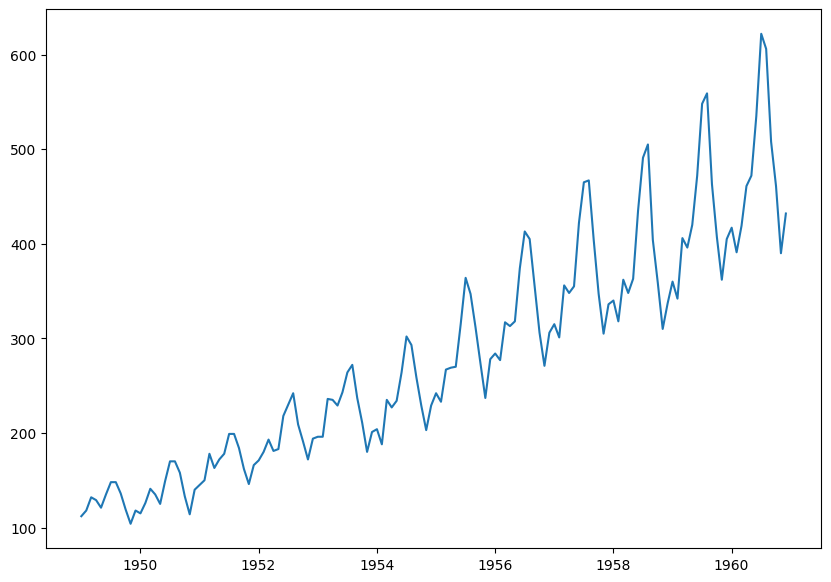

In [10]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['X_t'])
plt.show()

### ii. Moving Average

In [11]:
q_1 = 3

In [12]:
ma_1 = moving_average(df_1, q_1)

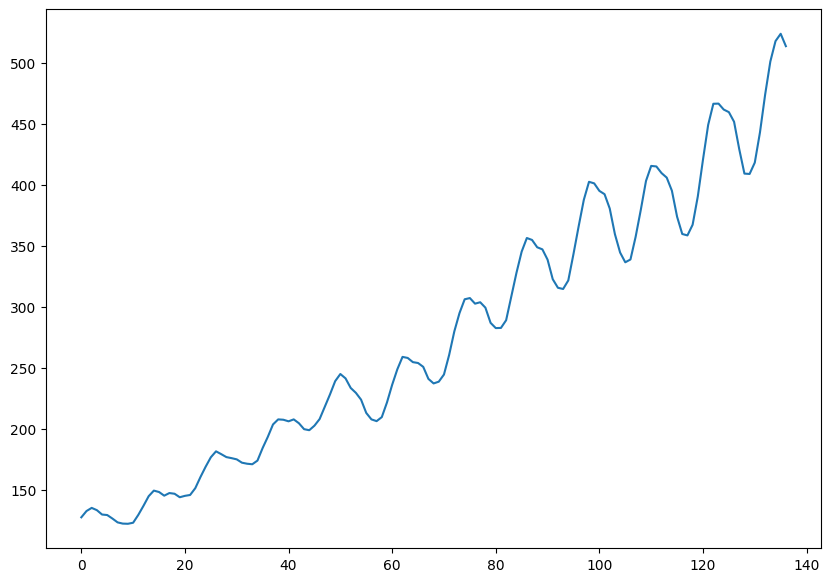

In [13]:
plt.figure(figsize = (10, 7))
plt.plot(ma_1['Time'], ma_1['X_t'])
plt.show()

### iii. Exponential Smooth

In [14]:
alpha_1 = 0.5

In [15]:
exp_1 = exponential_smooth(df_1, alpha_1)

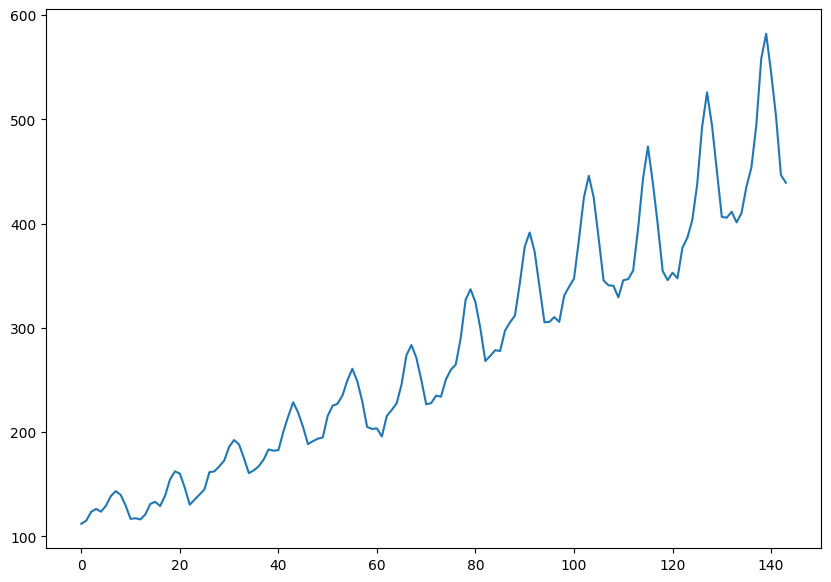

In [16]:
plt.figure(figsize = (10, 7))
plt.plot(exp_1['T'], exp_1['M'])
plt.show()

# 2. Female Births

### i. Normal

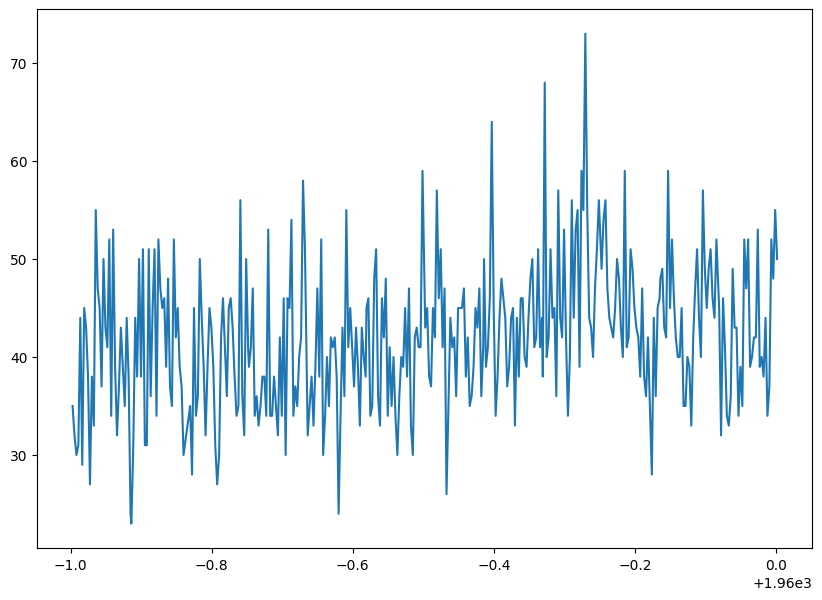

In [17]:
plt.figure(figsize = (10, 7))
plt.plot(df_2['Time'], df_2['X_t'])
plt.show()

### ii. Moving Average

In [18]:
q_2 = 3

In [19]:
ma_2 = moving_average(df_2, q_2)

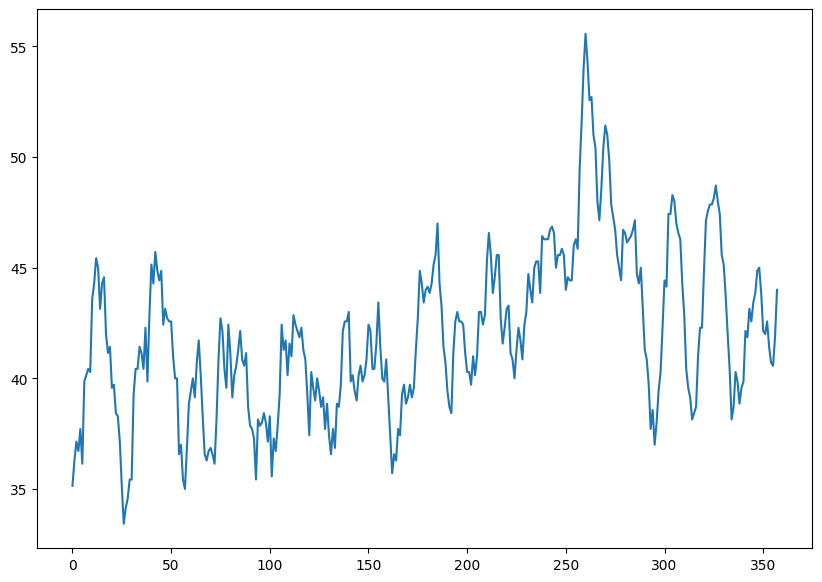

In [20]:
plt.figure(figsize = (10, 7))
plt.plot(ma_2['Time'], ma_2['X_t'])
plt.show()

### iii. Exponential Smooth

In [21]:
alpha_2 = 0.5

In [22]:
exp_2 = exponential_smooth(df_2, alpha_2)

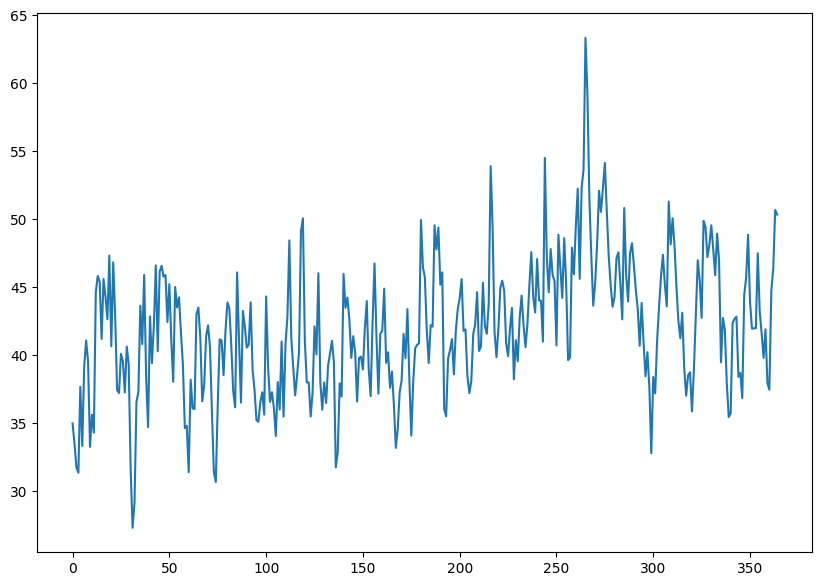

In [23]:
plt.figure(figsize = (10, 7))
plt.plot(exp_2['T'], exp_2['M'])
plt.show()

# 3. Temperatures

### i. Normal

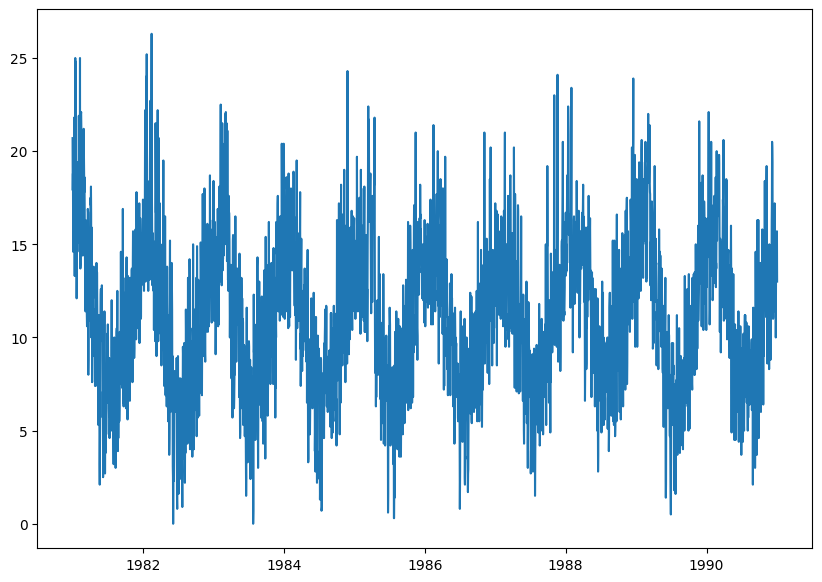

In [24]:
plt.figure(figsize = (10, 7))
plt.plot(df_3['Time'], df_3['X_t'])
plt.show()

### ii. Moving Average

In [25]:
q_3 = 3

In [26]:
ma_3 = moving_average(df_3, q_3)

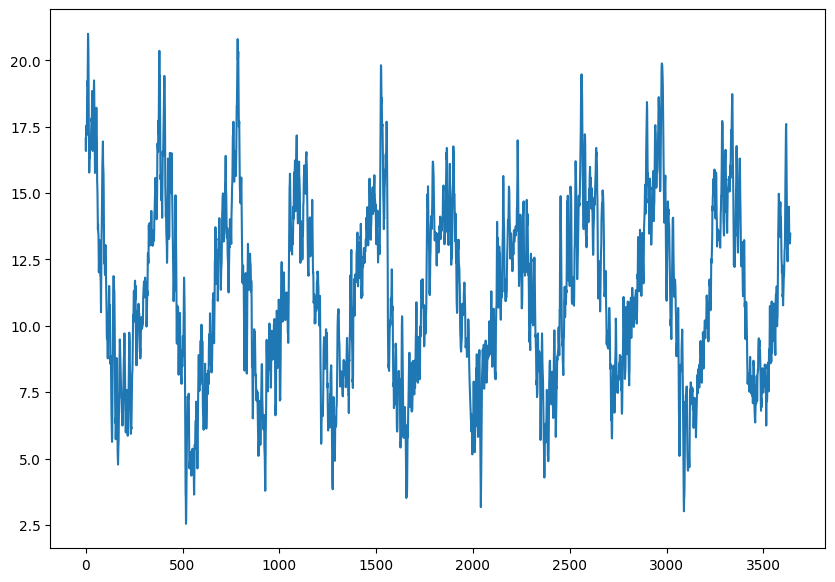

In [27]:
plt.figure(figsize = (10, 7))
plt.plot(ma_3['Time'], ma_3['X_t'])
plt.show()

### iii. Exponential Smooth

In [28]:
alpha_3 = 0.5

In [29]:
exp_3 = exponential_smooth(df_3, alpha_3)

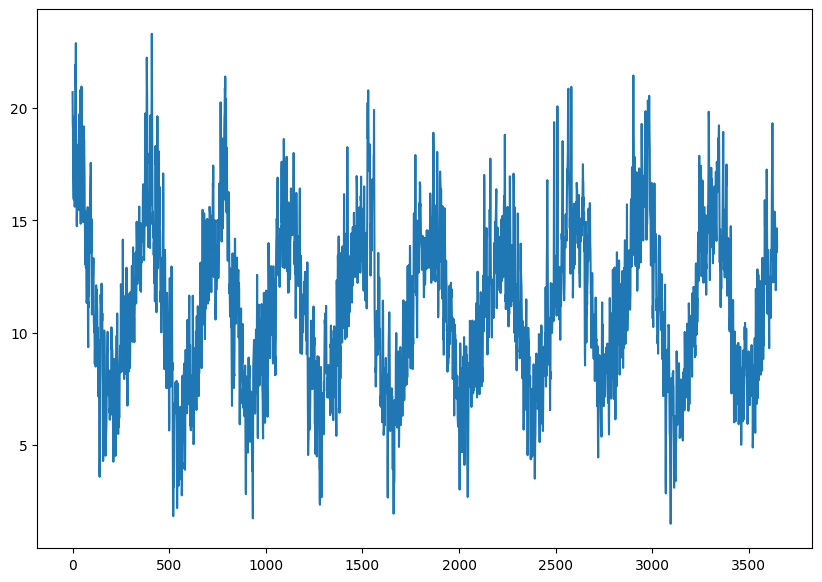

In [30]:
plt.figure(figsize = (10, 7))
plt.plot(exp_3['T'], exp_3['M'])
plt.show()

### Time of execution

In [31]:
end = time.time()

In [32]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 1 seconds.
